In [39]:
def split_data(df):
    df['ano']  = df['ano'].apply(lambda h:yaml.load(h))
    
    
    df['dado'] = df['ano'].apply(lambda x: list(x.values())[0])
    df['ano']  = df['ano'].apply(lambda x: list(x.keys())[0])
    df['dado'] = df['dado'].str.replace('.','').str.replace(',','.')
    
    return(df)

In [1]:
# IMPORT CONFIGs
import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../scripts')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH


# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
import geopandas as gpd
pd.options.display.max_columns = 999

#import plotly
#import plotly.graph_objs as go
#import plotly.offline as offline
#offline.init_notebook_mode(connected=True)

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)


# For changes in .py
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')




import numpy as np


import missingno as msno

stats = ['skew', 'mad', 'kurt']


import qgrid

def qg(df):
    return(qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False}))


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import itertools
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

import requests
import json
import xmltodict
import re
import urllib.request as urllib2
import io
import yaml

Populating the interactive namespace from numpy and matplotlib


### Import Data

In [2]:
df = pd.read_csv('dados_consolidados_final.csv')
df.shape

(13974977, 10)

In [3]:
url = "http://api-imp.seade.gov.br/v1/localidade"
r = requests.get(url).json()
df_loc = pd.DataFrame.from_records(r['localidades'])

### Explore Data

In [4]:
mask = df['ano']!='missing'
df = df[mask]
df.shape

In [5]:
df_loc.loc[656:661]

,codigo,codigo_pai,nivel,nome,nome_pai
656,495,714,Municípios,São José do Barreiro,Região de Governo de Cruzeiro
657,497,735,Municípios,São José do Rio Pardo,Região de Governo de São João da Boa Vista
658,498,737,Municípios,São José do Rio Preto,Região de Governo de São José do Rio Preto
659,499,738,Municípios,São José dos Campos,Região de Governo de São José dos Campos
660,616,681,Municípios,São Lourenço da Serra,Região Metropolitana de São Paulo
661,500,740,Municípios,São Luís do Paraitinga,Região de Governo de Taubaté


In [47]:
### Codigo de SJ dos Campos 499
mask = df['codigo_localidade']=='499'

df_sjc = split_data(df[mask])

In [176]:
df_sjc.head(10)

,ano,codigo_localidade,codigo_variavel,localidade,nome_localidade_pai,periodo,unidade,variavel,loc,year,dado
11149780,1980,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1980,1099.61
11149781,1980,499,11,São José dos Campos,Região de Governo de São José dos Campos,1980/1991/2000,Não possui unidade,Índice de Desenvolvimento Humano - IDH [Série interrompida],499,1980,0.751
11149782,1980,499,12,São José dos Campos,Região de Governo de São José dos Campos,1980/1991/2000,Não possui unidade,Índice de Desenvolvimento Humano Municipal - IDHM - Ranking dos Municípios [Série interrompida],499,1980,15
11149783,1980,499,54,São José dos Campos,Região de Governo de São José dos Campos,1980/1985/1988-1999,(Coeficiente por cem habitantes),Terminais Telefônicos [Série interrompida],499,1980,8.23
11149784,1980,499,55,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,Não possui unidade,População,499,1980,285587
11149785,1980,499,56,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,Não possui unidade,População Feminina,499,1980,141663
11149786,1980,499,57,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,Não possui unidade,População Masculina,499,1980,143924
11149787,1980,499,58,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,Não possui unidade,População Urbana,499,1980,275064
11149788,1980,499,59,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,Não possui unidade,População Rural,499,1980,10523
11149789,1980,499,60,São José dos Campos,Região de Governo de São José dos Campos,1980-2017,(Por mil habitantes),Taxa de Natalidade,499,1980,35.15


In [177]:
mask = df_sjc['variavel']=='Área'

df_sjc[mask]

,ano,codigo_localidade,codigo_variavel,localidade,nome_localidade_pai,periodo,unidade,variavel,loc,year,dado
11149780,1980,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1980,1099.61
11149958,1981,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1981,1099.61
11150108,1982,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1982,1099.61
11150259,1983,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1983,1099.61
11150416,1984,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1984,1099.61
11150576,1985,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1985,1099.61
11150763,1986,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1986,1099.61
11150925,1987,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1987,1099.61
11151091,1988,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1988,1099.61
11151293,1989,499,5,São José dos Campos,Região de Governo de São José dos Campos,1980-2019,(Em km2),Área,499,1989,1099.61


### Maps


GIS Dataset Brasil
==================

Geographic Information Systems (GIS) Dataset Brasil. Coleções de arquivos com 
dados geoespaciais em forma de vetor.

[![Previa do mapa de microregião](https://github.com/fititnt/gis-dataset-brasil/raw/master/microrregiao/topojson/preview.png "Previa do mapa de microregião. Clique para interagir")](https://github.com/fititnt/gis-dataset-brasil/blob/master/microrregiao/topojson/microrregiao.json)

**Conjunto de dados**
- UF
- Mesorregião
- Microrregião
- Municípios

**Formatos disponibilizados**
- Shapefile
- GeoJSON
- TopoJSON (compacto, ideal para uso na web)

## Autoria

> Nota pertinente: o tipo de informação contido neste repositório foi criado
a partir do trabalho de centenas de pessoas (antes mesmo da existência de
computadores digitais) ao longo de séculos. Em função disso, e da falta de
explicitamente terem definido licença de uso e citarem entidade que teria os
direitos de cópia, a licença DbCL é sugerida, porém possivelmente poderia ser
usado domínio público.

Shapefiles iniciais obtidos de <http://www.brasilemcidades.gov.br> (site
original indisponível).



In [163]:
df_maps = gpd.read_file('maps/Munic.shp')
df_maps.columns = df_maps.columns.str.lower()
# df_maps['id'] = df_maps['id'].astype(int)



### Cities to adjuste the name
rename_dic = {
    'Embu':'Embu das Artes',
    'Moji Mirim':'Mogi Mirim'
}

df_maps['nome'] = df_maps['nome'].replace(rename_dic)





In [164]:
df_maps.head(0)

,geocodigo,nome,uf,id_uf,regiao,mesoregiao,microregia,latitude,longitude,geometry


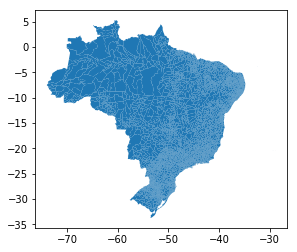

In [178]:
df_maps.plot()

In [165]:
mask = (df_maps['uf']=='SP')

df_maps_sp = df_maps[mask]


df_maps_sp = df_maps_sp.dissolve(by='nome')
df_maps_sp = df_maps_sp.reset_index()

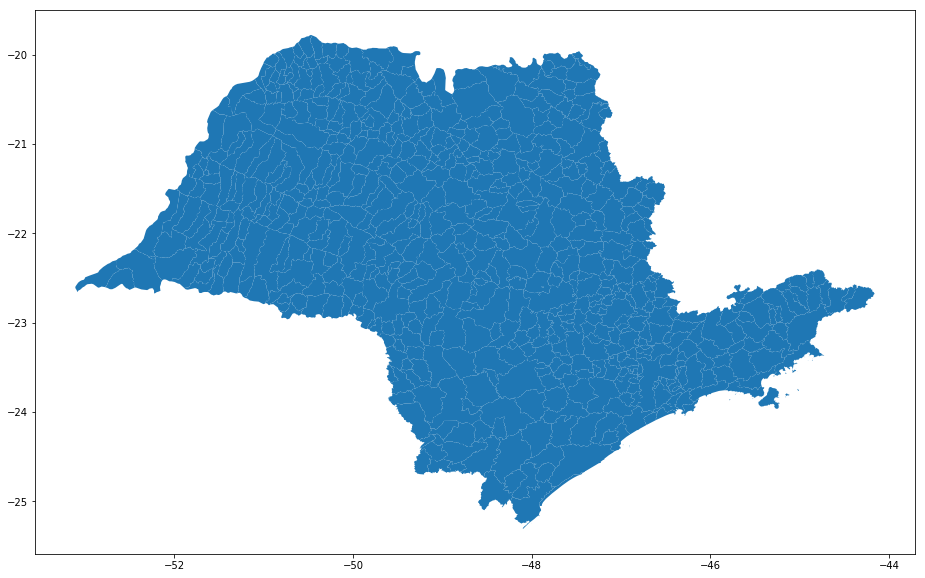

In [166]:
df_maps_sp.plot(figsize=(20,10))

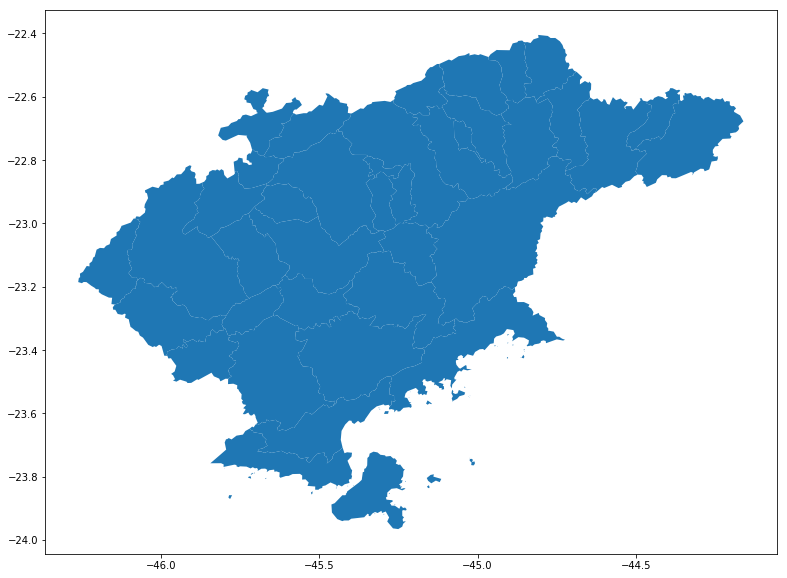

In [167]:
mask = (df_maps_sp['mesoregiao']=='VALE DO PARAIBA PAULISTA')

df_vale = df_maps_sp[mask]

df_vale.plot(figsize=(20,10))

In [168]:
df_maps_sp.head(0)

,nome,geometry,geocodigo,uf,id_uf,regiao,mesoregiao,microregia,latitude,longitude


In [201]:
cols = ['nome','mesoregiao','microregia','geometry']

cidades_sp = df_maps_sp[cols]
cidades_sp = cidades_sp.rename(columns={'nome':'localidade'})

In [205]:
cidades_sp.to_file("municipios_meso_micro.shp", encoding='utf-8')

### Put the Micro and Meso label in DF

In [214]:
cols = ['nome','mesoregiao','microregia']

cidades_sp = df_maps_sp[cols]
cidades_sp = cidades_sp.rename(columns={'nome':'localidade'})

In [209]:
df = split_data(df)

In [216]:
df_meso = pd.merge(df,cidades_sp, how = 'outer', on='localidade')

In [220]:
df_meso.to_csv("base_consolidada_final.csv",encoding='utf-8', index=False, chunksize=20000)